In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Задание 5
Загрузите датасет из файла House.csv со следующими полями (жилищный рынок Нью-Йорка):
<ul>
<li>BROKERTITLE: Название брокера
<li>TYPE: Тип дома
<li>PRICE: Стоимость дома
<li>BEDS: Количество спален
<li>BATH: Количество ванных комнат
<li>PROPERTYSQFT: Площадь объекта
<li>ADDRESS: Полный адрес
<li>STATE: Состояние
<li>MAIN_ADDRESS: Информация об основном адресе
<li>ADMINISTRATIVE_AREA_LEVEL_2: Информация уровня второй административной области
<li>LOCALITY: Информация о месторасположении
<li>SUBLOCALITY: Информация о сублокальности
<li>STREET_NAME: Название улицы
<li>LONG_NAME: Длинное имя
<li>FORMATTED_ADDRESS: Форматированный адрес
<li>LATITUDE: Координата широты
<li>LONGITUDE: Координата долготы
</ul>
<ol>
<li>Удалите все записи, где есть пустые значения и выведите полученный датасет на экран
<li>Постройте матрицу корреляции для количественных данных и тепловую карту
</ol>    

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/House.csv", sep=',') # загружаем файл
df = df.dropna() # удаляем все записи с пустыми значениями
print(f"Таблица 'House':\n{df}")

Таблица 'House':
                                            BROKERTITLE                TYPE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                   Brokered by Serhant      Condo for sale   
2                                Brokered by Sowae Corp      House for sale   
3                                   Brokered by COMPASS      Condo for sale   
4     Brokered by Sotheby's International Realty - E...  Townhouse for sale   
...                                                 ...                 ...   
4796                                Brokered by COMPASS      Co-op for sale   
4797                    Brokered by Mjr Real Estate Llc      Co-op for sale   
4798      Brokered by Douglas Elliman - 575 Madison Ave      Co-op for sale   
4799            Brokered by E Realty International Corp      Condo for sale   
4800                 Brokered by Nyc Realty Brokers Llc      Co-op for sale   

          PRICE  BEDS       BATH  

In [ ]:
corr = df.corr() # Матрица корреляции
print(f'Матрица корреляции:\n{corr}')

Матрица корреляции:
                 PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
PRICE         1.000000  0.052189  0.079371      0.110889 -0.020392  -0.054273
BEDS          0.052189  1.000000  0.776447      0.420503 -0.060933  -0.004529
BATH          0.079371  0.776447  1.000000      0.483935 -0.052235  -0.070892
PROPERTYSQFT  0.110889  0.420503  0.483935      1.000000  0.023413  -0.037308
LATITUDE     -0.020392 -0.060933 -0.052235      0.023413  1.000000   0.513969
LONGITUDE    -0.054273 -0.004529 -0.070892     -0.037308  0.513969   1.000000


<ipython-input-29-bf2ede011ae7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr() # Матрица корреляции


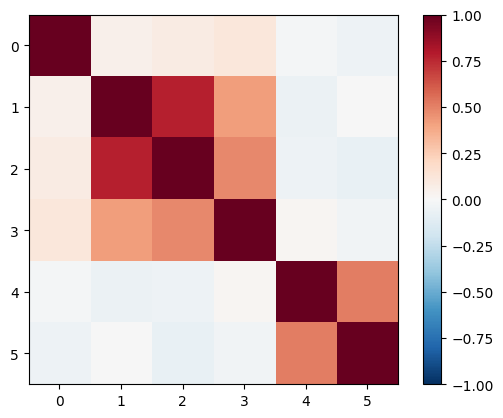

In [ ]:
plt.imshow(corr, cmap='RdBu_r', vmin=-1, vmax=1) # первый параметр - это матрица, второй параметр - цвет, 3 и 4 это минимальное и максимальное значение
plt.colorbar()
plt.show()

### Задание 6
<ol>
<li>Проанализируйте матрицу корреляции и тепловую карту и выберите три пары наиболее коррелирующих друг с другом параметров (ответ запишите в виде комментария в коде)
<li>Постройте для всех трех пар диаграммы рассеяния и проанализируйте, насколько диаграммы соответствуют коэффициентам корреляции (ответ запишите в виде комментария в коде).
</ol>

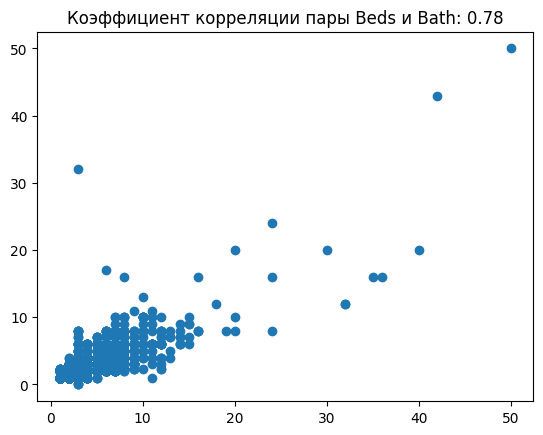

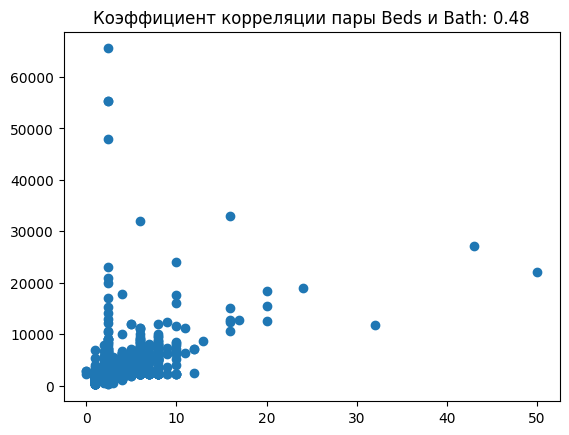

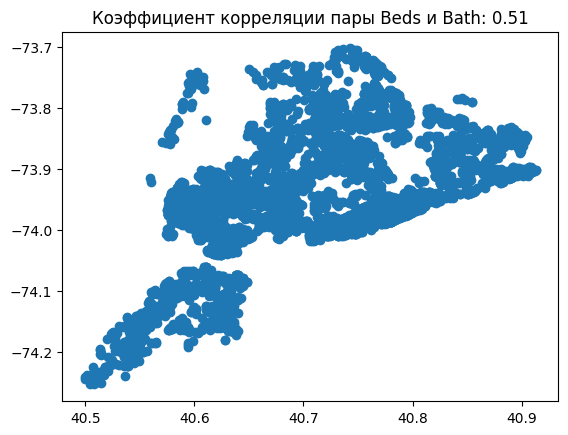

In [ ]:
# Три пары наиболее коррелирующих друг с другом параметров:
# 1. Beds и Bath
# 2. Bath и PROPERTYSQFT
# 3. Latitude и Longtude

plt.scatter(df['BEDS'], df['BATH'])
plt.title(f'Коэффициент корреляции пары Beds и Bath: {corr.loc["BEDS", "BATH"]:.2f}')
plt.show()

plt.scatter(df['BATH'], df['PROPERTYSQFT'])
plt.title(f'Коэффициент корреляции пары Beds и Bath: {corr.loc["BATH", "PROPERTYSQFT"]:.2f}')
plt.show()

plt.scatter(df['LATITUDE'], df['LONGITUDE'])
plt.title(f'Коэффициент корреляции пары Beds и Bath: {corr.loc["LATITUDE", "LONGITUDE"]:.2f}')
plt.show()

# диаграммы почти соответствуют коэффициентам корреляции

### Задание 7
<ol>
    <li>Удалите выбросы в столбцах PRICE и PROPERTYSQF, используя межквартильный диапазон (про него можно почитать в теории к практике 1 и по <a href = "https://www.codecamp.ru/blog/remove-outliers-python/">ссылке</a>)
    <li>Выведите информацию об оставшемся количестве строк        
    <li>Снова постройте матрицу корреляции и проведите анализ, как изменились коэффициенты корреляции, связанные с этими двумя полями (записать в виде комментария)        

In [ ]:
# Удаляем выбросы в столбце PRICE
Q1 = df['PRICE'].quantile(q=.25)
Q3 = df['PRICE'].quantile(q=.75)
IQR = df['PRICE'].apply(stats.iqr)

df2 = df[~((df['PRICE'] < (Q1-1.5*IQR)) | (df['PRICE'] > (Q3+1.5*IQR)))]

# Удаляем выбросы в столбце  PROPERTYSQFT
Q1 = df2['PROPERTYSQFT'].quantile(q=.25)
Q3 = df2['PROPERTYSQFT'].quantile(q=.75)
IQR = df2['PROPERTYSQFT'].apply(stats.iqr)

df3 = df2[~((df2['PROPERTYSQFT'] < (Q1-1.5*IQR)) | (df2['PROPERTYSQFT'] > (Q3+1.5*IQR)))]

print(f'Строк было: {df.shape[0]}')
print(f'Строк осталось: {df3.shape[0]}')

Строк было: 4801
Строк осталось: 1451


In [ ]:
corr2 = df3.corr() # Матрица корреляции
print(f'Матрица корреляции:\n{corr2}')

Матрица корреляции:
                 PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
PRICE         1.000000  0.274370  0.301227      0.115891  0.044794   0.093148
BEDS          0.274370  1.000000  0.675965      0.043963 -0.118998   0.180681
BATH          0.301227  0.675965  1.000000     -0.003221 -0.153490   0.136402
PROPERTYSQFT  0.115891  0.043963 -0.003221      1.000000  0.219472   0.218273
LATITUDE      0.044794 -0.118998 -0.153490      0.219472  1.000000   0.515081
LONGITUDE     0.093148  0.180681  0.136402      0.218273  0.515081   1.000000


<ipython-input-89-3ad732fdea0f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = df3.corr() # Матрица корреляции


In [ ]:
first = corr['PRICE']['PROPERTYSQFT']
second = corr2['PRICE']['PROPERTYSQFT']
print(f'Значние в первой матрице: {first}')
print(f'Значние в первой матрице: {second}')
print (f'Значение увеличилось на: {second-first}')

Значние в первой матрице: 0.11088876850890125
Значние в первой матрице: 0.11589061194289631
Значение увеличилось на: 0.005001843433995054
